In [100]:
import pandas as pd
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
tqdm.pandas()
from statistics import mean
from sklearn.utils import resample


In [2]:
# Loading the data
url='https://drive.google.com/file/d/1mqxv8AFExcVBryjJqk-m8aX_5mXzOi7O/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='UTF-8')

df.head()

,review_text,rating,branch_Disneyland California,branch_Disneyland Hong Kong,branch_Disneyland Paris,branch_Universal Studios Florida,branch_Universal Studios Japan,branch_Universal Studios Singapore,month,quarter,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,wife came first time 2006 10 year later return...,4,0,1,0,0,0,0,6,2,...,-0.442213,-0.376687,-0.467927,-0.788535,-0.87703,-0.924948,-0.888032,-1.079005,-1.132471,-1.042828
1,took daughter six time realli disappoint huge ...,1,0,1,0,0,0,0,6,2,...,-0.442213,-0.376687,-0.467927,-0.788535,-0.87703,-0.924948,-0.888032,-1.079005,-1.132471,-1.042828
2,fantast time disneyland hong kong come expect ...,5,0,1,0,0,0,0,7,3,...,-0.442213,-0.376687,-0.467927,-0.788535,-0.87703,-0.924948,-0.888032,-1.079005,-1.132471,-1.042828
3,weather fine still hot novemb took mtr train c...,3,0,1,0,0,0,0,11,4,...,-0.442213,-0.376687,-0.467927,-0.788535,-0.87703,-0.924948,-0.888032,-1.079005,-1.132471,-1.042828
4,like stay park lot differ attract mostli small...,4,0,1,0,0,0,0,1,1,...,-0.442213,-0.376687,-0.467927,-0.788535,-0.87703,-0.924948,-0.888032,-1.079005,-1.132471,-1.042828


In [9]:
# X = df[['revew_text', 'branch_Disneyland California',
#        'branch_Disneyland Hong Kong', 'branch_Disneyland Paris',
#        'branch_Universal Studios Florida', 'branch_Universal Studios Japan',
#        'branch_Universal Studios Singapore', 'month', 'quarter', 'year',
#        'attendance_millions_2010', 'attendance_millions_2011',
#        'attendance_millions_2012', 'attendance_millions_2013',
#        'attendance_millions_2014', 'attendance_millions_2015',
#        'attendance_millions_2016', 'attendance_millions_2017',
#        'attendance_millions_2018', 'attendance_millions_2019',
#        'attendance_millions_2020', 'attendance_millions_2021']]
# y = df[['rating']]

from sklearn.utils import resample
num_to_sample = 3000
df5 = resample(df[df['rating']==5],
             replace=True,
             n_samples=num_to_sample,
             random_state=42)
df4 = resample(df[df['rating']==4],
             replace=True,
             n_samples=num_to_sample,
             random_state=42)
df3 = resample(df[df['rating']==3],
             replace=True,
             n_samples=num_to_sample,
             random_state=42)
df2 = resample(df[df['rating']==2],
             replace=True,
             n_samples=num_to_sample,
             random_state=42)
df1 = resample(df[df['rating']==1],
             replace=True,
             n_samples=num_to_sample,
             random_state=42)

In [10]:
downsampled = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [11]:
%%time
# fix spelling errors
from tqdm import tqdm
tqdm.pandas()

downsampled['review_text'] = downsampled['review_text'].progress_apply(lambda x: str(TextBlob(x).correct()))

100%|██████████| 15000/15000 [3:28:23<00:00,  1.20it/s]  

CPU times: total: 2h 51min 16s
Wall time: 3h 28min 23s


In [31]:
# stem words again
# from nltk.stem.porter import PorterStemmer
# def stem_sentences(sentence):
#     tokens = sentence.split()
#     stemmed_tokens = [stemmer.stem(token) for token in tokens]
#     return ' '.join(stemmed_tokens)
# stemmer = PorterStemmer()
# downsampled['review_text'].apply(stem_sentences)


In [61]:
# 1543 (1537 after fixing spelling and lemetaizing) unique words that occurs more than once in this set of words. Helps determine the max_feature when vectorizing
# 7548 for 3000 dataset and fixed spelling and stemmed
# 7876 got 3000 dataset and fixed spelling
unique_words = Counter()
downsampled['review_text'].str.split().apply(unique_words.update)
# filtered = [x for x in results if results[x] >1]
# len(filtered)
unique_words.most_common()

[('ride', 27884),
 ('park', 23748),
 ('time', 14108),
 ('day', 12863),
 ('get', 10901),
 ('go', 10545),
 ('dinner', 9979),
 ('wait', 9687),
 ('one', 9220),
 ('line', 8474),
 ('pass', 7881),
 ('univers', 7238),
 ('visit', 6819),
 ('would', 6726),
 ('long', 6082),
 ('hour', 6065),
 ('queue', 5877),
 ('ticket', 5818),
 ('like', 5779),
 ('us', 5778),
 ('disneyland', 5602),
 ('people', 5552),
 ('good', 5310),
 ('food', 5208),
 ('place', 5097),
 ('even', 4912),
 ('kid', 4793),
 ('minute', 4773),
 ('great', 4711),
 ('went', 4691),
 ('attract', 4617),
 ('2', 4599),
 ('really', 4574),
 ('show', 4278),
 ('year', 4269),
 ('back', 4247),
 ('much', 4156),
 ('see', 4150),
 ('expert', 4049),
 ('man', 3978),
 ('every', 3854),
 ('enjoy', 3848),
 ('staff', 3764),
 ('express', 3754),
 ('also', 3752),
 ('close', 3701),
 ('want', 3695),
 ('studio', 3612),
 ('lot', 3585),
 ('take', 3550),
 ('crowd', 3491),
 ('porter', 3454),
 ('fast', 3414),
 ('could', 3399),
 ('harris', 3387),
 ('3', 3335),
 ('around', 328

In [62]:
%%time
# "bad":3.5
word_score = dict()
for idx, word in enumerate(unique_words):
    avg_score = downsampled[downsampled['review_text'].str.contains(word)]['rating'].mean()
    word_score[word] = avg_score

CPU times: total: 1min 27s
Wall time: 1min 28s


In [64]:
#check if the order of dictionaries are the same
list(unique_words.keys()) == list(word_score.keys())

True

Text(0, 0.5, 'counts')

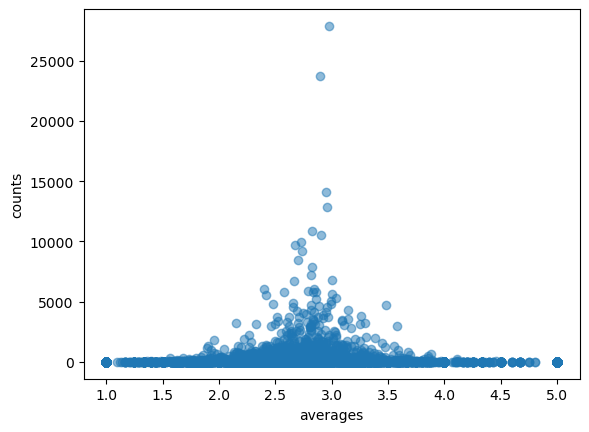

In [65]:
averages = list(word_score.values())
counts = list(unique_words.values())
plt.scatter(averages, counts, alpha=0.5)
plt.xlabel('averages')
plt.ylabel('counts')
# there are a lot of words that have a 3.0 which makes sense because the downsampled data has a 3.0 average.

In [51]:
#custom knn algorithm
def f(s):
    avg = sum(unique_words[word] for word in s.split())/len(s.split())
    return avg
X_train, X_test, y_train, y_test = train_test_split(downsampled['review_text'], downsampled['rating'], test_size=0.3, random_state=0)
y_pred = X_test.apply(f)

In [54]:
y_pred

1670     2.696512
13379    2.973779
10234    2.972420
4719     2.724882
7003     2.842829
           ...   
13499    2.902868
3828     2.698921
4645     2.857534
6069     2.645443
2506     2.732030
Name: review_text, Length: 4500, dtype: float64

In [55]:
y_test

1670     1
13379    5
10234    4
4719     2
7003     3
        ..
13499    5
3828     2
4645     2
6069     3
2506     1
Name: rating, Length: 4500, dtype: int64

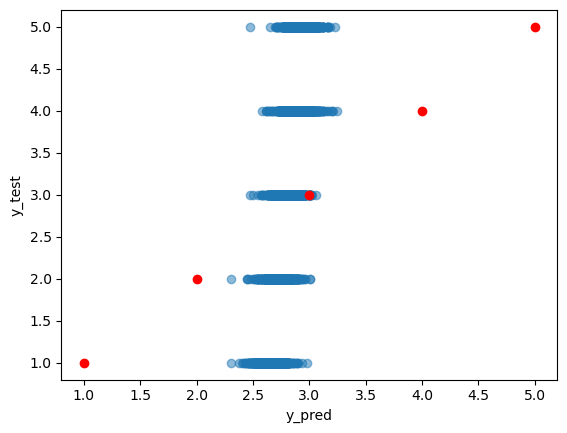

In [58]:
plt.scatter(y_pred, y_test, alpha=0.5)
plt.scatter([1,2,3,4,5],[1,2,3,4,5], color='red')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
# since many words are 2.5 - 3.0, this model is not very helpful

In [ ]:
#what if we only considered words that are used only in strong opinions


In [67]:
knn_df = pd.DataFrame({'word_score': word_score, 'unique_words': unique_words})
knn_df

,word_score,unique_words
bad,2.558800,1366
never,2.501824,3135
left,2.264786,1280
review,2.532148,866
wast,1.903915,1298
...,...,...
blizzard,5.000000,1
upheld,5.000000,1
gallectica,5.000000,1
usd50,5.000000,2


In [70]:
knn_df[~knn_df["word_score"].between(2.5,3.5)]

,word_score,unique_words
left,2.264786,1280
wast,1.903915,1298
money,2.154818,3270
poor,1.986772,688
not,2.463961,2990
...,...,...
blizzard,5.000000,1
upheld,5.000000,1
gallectica,5.000000,1
usd50,5.000000,2


In [94]:
def knnf(s):
    seen = 0
    summ = 0
    for word in s.split():
        if word in word_score:
            seen += 1
            summ += word_score[word]
    return 0 if seen == 0 else round(summ/seen)
knnf(downsampled['review_text'][0])

3

In [95]:
#see performance of this method
np.random.seed(10)
test = downsampled['review_text'].sample(n=300)
y = downsampled['rating'].sample(n=300)
y_pred = test.apply(knnf)
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        64
           2       0.33      0.02      0.03        66
           3       0.20      1.00      0.33        59
           4       0.00      0.00      0.00        63
           5       0.00      0.00      0.00        48

    accuracy                           0.20       300
   macro avg       0.11      0.20      0.07       300
weighted avg       0.11      0.20      0.07       300



C:\Users\16479\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\16479\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\16479\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
%%time
#attempt a neural network approach
np.random.seed(10)
total_docs = 15000
# X = downsampled['review_text'].sample(n=total_docs)
# y = downsampled['rating'].sample(n=total_docs)
X = downsampled['review_text']
y = downsampled['rating']

def track_progress(progress):
    return tqdm(progress, total=total_docs, desc="Vectorizing text data")

#only the 1500 most frequent tokens are used
tfidfconverter = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorized_data = tfidfconverter.fit_transform(track_progress(X))

X_train, X_test, y_train, y_test = train_test_split(vectorized_data, y, test_size=0.2, random_state=0)


Vectorizing text data: 100%|██████████| 15000/15000 [00:00<00:00, 28990.43it/s]

CPU times: total: 438 ms
Wall time: 601 ms


In [ ]:
%%time
import torch
import torch.nn as nn
import torch.optim as optim

class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, hidden_dim, output_dim, dropout):
        super().__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # Convolutional layers
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters, kernel_size=(fs, embedding_dim)) 
            for fs in filter_sizes
        ])
        
        # Fully-connected layers
        self.fc = nn.Linear(len(filter_sizes) * num_filters, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        # text shape: [batch_size, seq_len]
        embedded = self.embedding(text)
        # embedded shape: [batch_size, seq_len, embedding_dim]
        
        # Add channel dimension for convolution
        embedded = embedded.unsqueeze(1)
        # embedded shape: [batch_size, 1, seq_len, embedding_dim]
        
        # Apply convolutional layers
        conved = [nn.functional.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        # conved[i] shape: [batch_size, num_filters, seq_len - filter_sizes[i] + 1]
        
        # Apply max pooling
        pooled = [nn.functional.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        # pooled[i] shape: [batch_size, num_filters]
        
        # Concatenate pooled features
        cat = self.dropout(torch.cat(pooled, dim=1))
        # cat shape: [batch_size, len(filter_sizes) * num_filters]
        
        # Apply fully-connected layers
        hidden = nn.functional.relu(self.fc(cat))
        # hidden shape: [batch_size, hidden_dim]
        
        # Apply output layer
        output = self.output(hidden)
        # output shape: [batch_size, output_dim]
        
        return output

# Define hyperparameters
vocab_size = 10000
embedding_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]
hidden_dim = 256
output_dim = 5
dropout = 0.5
num_epochs =5
# Initialize model
model = CNNClassifier(vocab_size, embedding_dim, num_filters, filter_sizes, hidden_dim, output_dim, dropout)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train model
for epoch in range(num_epochs):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    output = model(torch.LongTensor(X_train.todense()))
    loss = criterion(output, torch.tensor(y_train.to_numpy()-1))

    # Backward pass
    loss.backward()
    optimizer.step()
    print(f"epoch: {epoch}")

In [ ]:
outputs = model(torch.LongTensor(X_test.todense()))
_, y_pred = torch.max(outputs.data, 1)
print(classification_report(y_pred, y_test))

In [ ]:
# X.shape

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
# classifier.fit(X_train, y_train) 
# y_pred = classifier.predict(X_test)
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

In [ ]:
# downsampled.to_csv('downsampled_fixed_spelling.csv')

In [ ]:
# stem_sentences(downsampled['review_text'][1])